In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from dython.nominal import identify_nominal_columns
from dython.nominal import associations
import time
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf


In [2]:
pd.set_option('display.max_columns', None)
# Import our input dataset
dogs = pd.read_csv('../Resources/Shelter_adoption_demograpics.csv')
dogs.head()

,index_id_intake,animal_id_intake,breed_category,breed_consolidated,breed_group,breed_contains_pitbull,color_consolidated,intake_type,intake_condition,sex_upon_intake_subtype,age_intake(days),age_intake(years),age_range_intake,intake_date,intake_month,intake_day1,intake_year,intake_numeric_weekday,intake_hour,outcome_date,outcome_month,outcome_day,outcome_year,outcome_weekday,age_outcome(days),age_upon_outcome(years),age_range_outcome,days_in_shelter,outcome,zipcode,population,population_density,land_area_in_sqmi,housing_units,median_household_income,Male_Population,Female_Population,Less_than_high_school,High_School_Graduate,Associates_degree,Bachelors_degree,Masters_degree,Professional_school_degree,Doctorate_degree,Race_white,Race_black_African_American,Race_American_Indian_Alaskan_native,Race_Asian,Race_Native_Hawaiian_Pacific_Islander,Race-Other,Race_Two_or_more
0,142136,A362707,Mix,retriever,sporting,N,Black,Owner Surrender,Sick,Female,4015,11.0,"(10.0, 12.5]",1/27/2016,1,27,2016,2,12,1/10/2017,1.0,10.0,2017.0,Tuesday,4667.0,12.79,"(12.5, 15.0]",348,Success,78725,6083,346,17.57,1978,52381,2988,3095,1890,2481,120,597,127,0,15,2924,1838,96,55,13,970,187
1,130786,A396810,Mix,retriever,sporting,N,Black,Stray,Injured,Female,4745,13.0,"(12.5, 15.0]",8/22/2016,8,22,2016,0,16,12/23/2016,12.0,23.0,2016.0,Friday,4912.0,13.46,"(12.5, 15.0]",122,Success,78724,21696,889,24.40,6138,38479,11181,10515,4341,5270,683,915,245,18,71,8339,6167,239,100,6,6165,680
2,123222,A428783,Purebred,herding,working-herding,N,Other,Public Assist,Normal,Female,2920,8.0,"(7.5, 10.0]",1/31/2014,1,31,2014,4,16,2/13/2014,2.0,13.0,2014.0,Thursday,3023.0,8.28,"(7.5, 10.0]",13,Success,78758,44072,4747,9.28,19577,43537,23014,21058,6267,12480,1690,6744,2167,169,200,25073,4810,467,2911,29,9196,1586
3,58675,A442798,Mix,terrier,terrier,N,White/Other,Public Assist,Normal,Female,3285,9.0,"(7.5, 10.0]",4/10/2015,4,10,2015,4,16,4/29/2015,4.0,29.0,2015.0,Wednesday,3485.0,9.55,"(7.5, 10.0]",18,Success,78752,18064,5403,3.34,7944,34716,9778,8286,3976,4429,493,2095,807,88,120,10787,2124,334,333,10,3781,695
4,76282,A443790,Mix,herding,working-herding,N,Black/Other,Stray,Normal,Male,3285,9.0,"(7.5, 10.0]",9/3/2014,9,3,2014,2,17,9/13/2014,9.0,13.0,2014.0,Saturday,3312.0,9.07,"(7.5, 10.0]",10,Success,78745,55614,4166,13.35,25749,50672,27813,27801,5393,18935,2426,10258,3204,587,359,40450,2596,601,1133,32,8730,2072


In [3]:
# Create new DF with animal_ids
#dogs.set_index("index_id_intake", inplace = True)

animal_id = pd.DataFrame().assign(animal_id_intake = dogs["animal_id_intake"])
dogs.head()

,index_id_intake,animal_id_intake,breed_category,breed_consolidated,breed_group,breed_contains_pitbull,color_consolidated,intake_type,intake_condition,sex_upon_intake_subtype,age_intake(days),age_intake(years),age_range_intake,intake_date,intake_month,intake_day1,intake_year,intake_numeric_weekday,intake_hour,outcome_date,outcome_month,outcome_day,outcome_year,outcome_weekday,age_outcome(days),age_upon_outcome(years),age_range_outcome,days_in_shelter,outcome,zipcode,population,population_density,land_area_in_sqmi,housing_units,median_household_income,Male_Population,Female_Population,Less_than_high_school,High_School_Graduate,Associates_degree,Bachelors_degree,Masters_degree,Professional_school_degree,Doctorate_degree,Race_white,Race_black_African_American,Race_American_Indian_Alaskan_native,Race_Asian,Race_Native_Hawaiian_Pacific_Islander,Race-Other,Race_Two_or_more
0,142136,A362707,Mix,retriever,sporting,N,Black,Owner Surrender,Sick,Female,4015,11.0,"(10.0, 12.5]",1/27/2016,1,27,2016,2,12,1/10/2017,1.0,10.0,2017.0,Tuesday,4667.0,12.79,"(12.5, 15.0]",348,Success,78725,6083,346,17.57,1978,52381,2988,3095,1890,2481,120,597,127,0,15,2924,1838,96,55,13,970,187
1,130786,A396810,Mix,retriever,sporting,N,Black,Stray,Injured,Female,4745,13.0,"(12.5, 15.0]",8/22/2016,8,22,2016,0,16,12/23/2016,12.0,23.0,2016.0,Friday,4912.0,13.46,"(12.5, 15.0]",122,Success,78724,21696,889,24.40,6138,38479,11181,10515,4341,5270,683,915,245,18,71,8339,6167,239,100,6,6165,680
2,123222,A428783,Purebred,herding,working-herding,N,Other,Public Assist,Normal,Female,2920,8.0,"(7.5, 10.0]",1/31/2014,1,31,2014,4,16,2/13/2014,2.0,13.0,2014.0,Thursday,3023.0,8.28,"(7.5, 10.0]",13,Success,78758,44072,4747,9.28,19577,43537,23014,21058,6267,12480,1690,6744,2167,169,200,25073,4810,467,2911,29,9196,1586
3,58675,A442798,Mix,terrier,terrier,N,White/Other,Public Assist,Normal,Female,3285,9.0,"(7.5, 10.0]",4/10/2015,4,10,2015,4,16,4/29/2015,4.0,29.0,2015.0,Wednesday,3485.0,9.55,"(7.5, 10.0]",18,Success,78752,18064,5403,3.34,7944,34716,9778,8286,3976,4429,493,2095,807,88,120,10787,2124,334,333,10,3781,695
4,76282,A443790,Mix,herding,working-herding,N,Black/Other,Stray,Normal,Male,3285,9.0,"(7.5, 10.0]",9/3/2014,9,3,2014,2,17,9/13/2014,9.0,13.0,2014.0,Saturday,3312.0,9.07,"(7.5, 10.0]",10,Success,78745,55614,4166,13.35,25749,50672,27813,27801,5393,18935,2426,10258,3204,587,359,40450,2596,601,1133,32,8730,2072


In [4]:
dogs.drop(["index_id_intake", "animal_id_intake","intake_date", "outcome_date", "outcome_month", "outcome_day", "outcome_year", "outcome_weekday",
          "age_outcome(days)", "age_upon_outcome(years)", "outcome_weekday", "age_outcome(days)", "age_upon_outcome(years)", "age_intake(years)",
           "age_range_intake", "intake_month", "intake_day1", "intake_year", "intake_numeric_weekday", "intake_hour", "land_area_in_sqmi",
           "age_range_outcome"], axis = 1, inplace = True)

In [ ]:
# from dython.nominal import identify_nominal_columns
# categorical_features=identify_nominal_columns(dogs)
# categorical_features


In [ ]:
# associations(dogs, nominal_columns='auto', numerical_columns=None, mark_columns=False,
#              nom_nom_assoc='cramer', num_num_assoc='pearson', cramers_v_bias_correction=True, nan_strategy='replace',
#              nan_replace_value=0.0, ax=None, figsize=None, annot=True, fmt='.2f',
#              cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
#              compute_only=False, clustering=False, title=None, filename=None)

In [ ]:
# complete_correlation= associations(dogs, filename= 'test_correlation.png', figsize=(10,10))

In [5]:
# Generate our categorical variable lists
dogs_cat = dogs.dtypes[dogs.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
dogs[dogs_cat].nunique()

breed_category              2
breed_consolidated         12
breed_group                11
breed_contains_pitbull      2
color_consolidated         14
intake_type                 4
intake_condition           10
sex_upon_intake_subtype     3
outcome                     2
dtype: int64

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(dogs[dogs_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(dogs_cat)
encode_df.head(5)

,breed_category_Mix,breed_category_Purebred,breed_consolidated_Malinois/German Shepherd,breed_consolidated_chihuahua,breed_consolidated_guardian,breed_consolidated_herding,breed_consolidated_hound,breed_consolidated_nonsporting,breed_consolidated_pit bull,breed_consolidated_pointer,breed_consolidated_retriever,breed_consolidated_terrier,breed_consolidated_toy,breed_consolidated_working,breed_consolidated_nan,breed_group_Hound,breed_group_Nonsporting,breed_group_Pit bull terrier,breed_group_hound,breed_group_nonsporting,breed_group_pit bull,breed_group_sporting,breed_group_terrier,breed_group_toy,breed_group_working,breed_group_working-herding,breed_group_nan,breed_contains_pitbull_N,breed_contains_pitbull_Y,color_consolidated_Black,color_consolidated_Black/Other,color_consolidated_Black/White,color_consolidated_Brindle,color_consolidated_Brown,color_consolidated_Brown/Other,color_consolidated_Brown/White,color_consolidated_Other,color_consolidated_Red/Other,color_consolidated_Tan/Tan Mix,color_consolidated_Tan/White,color_consolidated_White,color_consolidated_White/Black or Brown,color_consolidated_White/Other,intake_type_Abandoned,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_condition_Aged,intake_condition_Behavior,intake_condition_Injured,intake_condition_Medical,intake_condition_Neonatal,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,intake_condition_Pregnant,intake_condition_Sick,sex_upon_intake_subtype_Female,sex_upon_intake_subtype_Male,sex_upon_intake_subtype_Unknown,outcome_Fail,outcome_Success
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
# Merge one-hot encoded features and drop the originals
dogs = dogs.merge(encode_df,left_index=True, right_index=True)
dogs = dogs.drop(dogs_cat,1)
dogs.head(5)

C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,age_intake(days),days_in_shelter,zipcode,population,population_density,housing_units,median_household_income,Male_Population,Female_Population,Less_than_high_school,High_School_Graduate,Associates_degree,Bachelors_degree,Masters_degree,Professional_school_degree,Doctorate_degree,Race_white,Race_black_African_American,Race_American_Indian_Alaskan_native,Race_Asian,Race_Native_Hawaiian_Pacific_Islander,Race-Other,Race_Two_or_more,breed_category_Mix,breed_category_Purebred,breed_consolidated_Malinois/German Shepherd,breed_consolidated_chihuahua,breed_consolidated_guardian,breed_consolidated_herding,breed_consolidated_hound,breed_consolidated_nonsporting,breed_consolidated_pit bull,breed_consolidated_pointer,breed_consolidated_retriever,breed_consolidated_terrier,breed_consolidated_toy,breed_consolidated_working,breed_consolidated_nan,breed_group_Hound,breed_group_Nonsporting,breed_group_Pit bull terrier,breed_group_hound,breed_group_nonsporting,breed_group_pit bull,breed_group_sporting,breed_group_terrier,breed_group_toy,breed_group_working,breed_group_working-herding,breed_group_nan,breed_contains_pitbull_N,breed_contains_pitbull_Y,color_consolidated_Black,color_consolidated_Black/Other,color_consolidated_Black/White,color_consolidated_Brindle,color_consolidated_Brown,color_consolidated_Brown/Other,color_consolidated_Brown/White,color_consolidated_Other,color_consolidated_Red/Other,color_consolidated_Tan/Tan Mix,color_consolidated_Tan/White,color_consolidated_White,color_consolidated_White/Black or Brown,color_consolidated_White/Other,intake_type_Abandoned,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_condition_Aged,intake_condition_Behavior,intake_condition_Injured,intake_condition_Medical,intake_condition_Neonatal,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,intake_condition_Pregnant,intake_condition_Sick,sex_upon_intake_subtype_Female,sex_upon_intake_subtype_Male,sex_upon_intake_subtype_Unknown,outcome_Fail,outcome_Success
0,4015,348,78725,6083,346,1978,52381,2988,3095,1890,2481,120,597,127,0,15,2924,1838,96,55,13,970,187,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,4745,122,78724,21696,889,6138,38479,11181,10515,4341,5270,683,915,245,18,71,8339,6167,239,100,6,6165,680,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2920,13,78758,44072,4747,19577,43537,23014,21058,6267,12480,1690,6744,2167,169,200,25073,4810,467,2911,29,9196,1586,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3285,18,78752,18064,5403,7944,34716,9778,8286,3976,4429,493,2095,807,88,120,10787,2124,334,333,10,3781,695,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3285,10,78745,55614,4166,25749,50672,27813,27801,5393,18935,2426,10258,3204,587,359,40450,2596,601,1133,32,8730,2072,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [8]:
# Split our preprocessed data into our features and target arrays. Split before using standard scaler so that testing
# data isn't influencing the standardization
y = dogs["outcome_Success"].values
X = dogs.drop(["outcome_Success","outcome_Fail"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [9]:
feature_names = dogs.drop(["outcome_Success","outcome_Fail"],1).columns

C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [10]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Neural Network

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
# import eli5
# from eli5.sklearn import PermutationImportance

In [11]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  15
hidden_nodes_layer2 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                1260      
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,516
Trainable params: 1,516
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
191/191 [==============================] - 1s 1ms/step - loss: 0.6527 - accuracy: 0.6519
Epoch 2/100
191/191 [==============================] - 0s 1ms/step - loss: 0.6153 - accuracy: 0.6812
Epoch 3/100
191/191 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.6899
Epoch 4/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.6942
Epoch 5/100
191/191 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.6991
Epoch 6/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.7027
Epoch 7/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.7068
Epoch 8/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7037
Epoch 9/100
191/191 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.7101
Epoch 10/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5730 - accura

191/191 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7564
Epoch 82/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.7570
Epoch 83/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7598
Epoch 84/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7621
Epoch 85/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7603
Epoch 86/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7597
Epoch 87/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.7608
Epoch 88/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7623
Epoch 89/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.7641
Epoch 90/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

64/64 - 0s - loss: 0.7019 - accuracy: 0.6532 - 203ms/epoch - 3ms/step
Loss: 0.7019389867782593, Accuracy: 0.6532416343688965


## Logistic Regression Model with Data

In [16]:
# Define the logistic regression model
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(solver="lbfgs",max_iter=1000)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.679


C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,1.0
8,1.0,1.0
9,1.0,0.0


In [ ]:
print(list(zip(log_classifier.coef_, feature_names)))

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[  53,  621],
       [  33, 1329]], dtype=int64)

In [22]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.62      0.08      0.14       674
         1.0       0.68      0.98      0.80      1362

    accuracy                           0.68      2036
   macro avg       0.65      0.53      0.47      2036
weighted avg       0.66      0.68      0.58      2036



## Random Forest Model with Data

In [28]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)

acc_score = accuracy_score(y_test, predictions)
print(f" Random forest predictive accuracy: {acc_score:.3f}")

 Random forest predictive accuracy: 0.719


In [25]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [26]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Failure", "Success"], columns=["Failure", "Success"])

cm_df

,Failure,Success
Failure,246,428
Success,144,1218


In [29]:
# Displaying results
print("Confusion Matrix for Dogs")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix for Dogs


,Failure,Success
Failure,246,428
Success,144,1218


Accuracy Score : 0.7190569744597249
Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.36      0.46       674
         1.0       0.74      0.89      0.81      1362

    accuracy                           0.72      2036
   macro avg       0.69      0.63      0.64      2036
weighted avg       0.70      0.72      0.69      2036



## SVM Model with Data

In [30]:
from sklearn.svm import SVC

# Create the SVM model
svm = SVC(kernel="rbf")

In [31]:
# Train the model
svm.fit(X_train, y_train)

SVC()

In [32]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.669


## Features

In [33]:
attributes = list(dogs)

sorted(zip(rf_model.feature_importances_, attributes), reverse=True)

#print(attributes,model_brfc.feature_importances_)

[(0.18808210647180243, 'days_in_shelter'),
 (0.10961143884262674, 'age_intake(days)'),
 (0.02081930984888109, 'sex_upon_intake_subtype_Male'),
 (0.019996930189918216, 'sex_upon_intake_subtype_Female'),
 (0.018518431645059674, 'breed_category_Purebred'),
 (0.01830269737648811, 'color_consolidated_Other'),
 (0.018266487285667134, 'breed_category_Mix'),
 (0.015866743104287713, 'color_consolidated_Black/White'),
 (0.015609975813131623, 'color_consolidated_Tan/Tan Mix'),
 (0.014719996123772328, 'color_consolidated_White/Black or Brown'),
 (0.014011769036686585, 'intake_condition_Normal'),
 (0.013866705379644323, 'color_consolidated_White'),
 (0.013401127132606685, 'color_consolidated_Black/Other'),
 (0.01327139418474609, 'color_consolidated_Tan/White'),
 (0.012768281297009047, 'color_consolidated_Brown/White'),
 (0.01210733842779645, 'zipcode'),
 (0.011746362058469828, 'population_density'),
 (0.011670403644426388, 'color_consolidated_Brown'),
 (0.011614189119267086, 'Race_black_African_Ame

Text(69.0, 0.5, 'Actual')

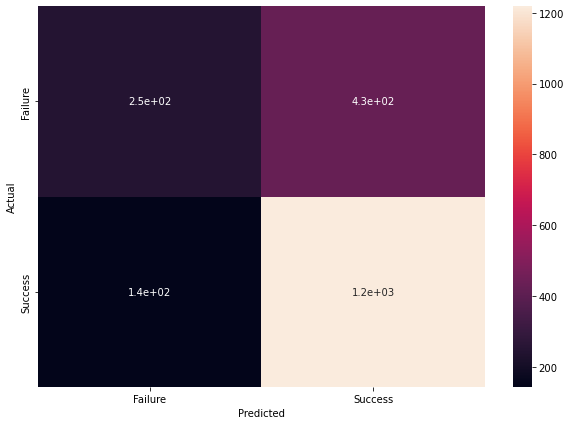

In [34]:
#Plotting a confustion matrix using matplotlib


%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_df,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')